<a href="https://www.kaggle.com/code/salmaashraf12/breast-cancer-dataset-multicollinearty?scriptVersionId=165929610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
df=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns=['Unnamed: 32','id'],inplace=True)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
df.drop(columns=['diagnosis']).corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [9]:
# search for multicolinarty (high corr between features)
df['diagones']=pd.get_dummies(df['diagnosis'],drop_first=True).astype(int)

In [10]:
df.head()
df.drop(columns=['diagnosis'],inplace=True)

In [11]:
df.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagones
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1


In [12]:


"""
there is high corr between this features which is multicollinarty
so as we dont have null values we will remove the cols with low corr with target
and keep only one from those features with high corr with target

area_mean
perimeter_mean
radius_mean
"""
print(df['diagones'].corr(df["radius_mean"]))
print(df['diagones'].corr(df["perimeter_mean"]))
print(df['diagones'].corr(df["area_mean"]))
df.drop(columns=["area_mean","radius_mean"],inplace=True)
"""
area_worst
perimeter_mean
perimeter_worst
"""
print(df['diagones'].corr(df["area_worst"]))
print(df['diagones'].corr(df["perimeter_mean"]))
print(df['diagones'].corr(df["perimeter_worst"]))
df.drop(columns=["area_worst",
"perimeter_mean"],inplace=True)
print(df['concave points_mean'].corr(df['diagones']))
print(df['concave points_worst'].corr(df['diagones']))
print(df['texture_mean'].corr(df['diagones']))
df.drop(columns=['texture_mean','concave points_mean'],inplace=True)
print(df['radius_se'].corr(df['diagones']))
print(df['perimeter_se'].corr(df['diagones']))
print(df['area_se'].corr(df['diagones']))
df.drop(columns=['area_se','perimeter_se'],inplace=True)

0.7300285113754558
0.742635529725832
0.7089838365853891
0.7338250349210504
0.742635529725832
0.7829141371737584
0.7766138400204349
0.7935660171412687
0.4151852998452037
0.5671338208247165
0.5561407034314825
0.5482359402780237


In [13]:
df.corr()

,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,...,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagones
smoothness_mean,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.248396,...,0.213120,0.036072,0.238853,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.570517,...,0.535315,0.248133,0.590210,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,0.098564,0.670279,0.691270,...,0.688236,0.299879,0.729565,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
symmetry_mean,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.342627,...,0.185728,0.090651,0.219169,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.446630,...,-0.253691,-0.051269,-0.205151,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838
radius_se,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.332358,...,0.715065,0.194799,0.719684,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559,0.567134
texture_se,0.068406,0.046205,0.076218,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.194998,...,-0.111690,0.409003,-0.102242,-0.073658,-0.092439,-0.068956,-0.119638,-0.128215,-0.045655,-0.008303
smoothness_se,0.332375,0.135299,0.098564,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.268685,...,-0.230691,-0.074743,-0.217304,0.314457,-0.055558,-0.058298,-0.102007,-0.107342,0.101480,-0.067016
compactness_se,0.318943,0.738722,0.670279,0.421659,0.559837,0.356065,0.231700,0.336696,1.000000,0.801268,...,0.204607,0.143003,0.260516,0.227394,0.678780,0.639147,0.483208,0.277878,0.590973,0.292999
concavity_se,0.248396,0.570517,0.691270,0.342627,0.446630,0.332358,0.194998,0.268685,0.801268,1.000000,...,0.186904,0.100241,0.226680,0.168481,0.484858,0.662564,0.440472,0.197788,0.439329,0.253730


In [14]:
df.head()

,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,...,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagones
0,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,...,25.38,17.33,184.60,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,...,24.99,23.41,158.80,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,...,23.57,25.53,152.50,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,...,14.91,26.50,98.87,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,...,22.54,16.67,152.20,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [15]:
df.shape

(569, 23)

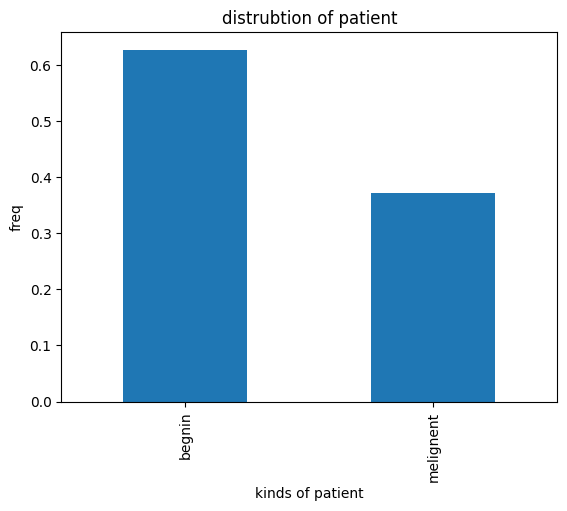

In [16]:
df['diagones'].value_counts(normalize=True).rename({0:'begnin',1:'melignent'}).plot(kind="bar")
plt.ylabel("freq")
plt.xlabel("kinds of patient")
plt.title("distrubtion of patient");

In [17]:
df['diagones'].value_counts(normalize=True)

diagones
0    0.627417
1    0.372583
Name: proportion, dtype: float64

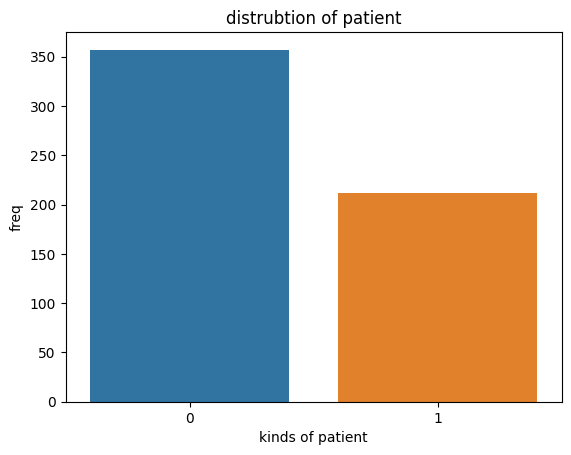

In [18]:
sns.countplot(x=df['diagones'],data=df)
plt.ylabel("freq")
plt.xlabel("kinds of patient")
plt.title("distrubtion of patient");

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   smoothness_mean          569 non-null    float64
 1   compactness_mean         569 non-null    float64
 2   concavity_mean           569 non-null    float64
 3   symmetry_mean            569 non-null    float64
 4   fractal_dimension_mean   569 non-null    float64
 5   radius_se                569 non-null    float64
 6   texture_se               569 non-null    float64
 7   smoothness_se            569 non-null    float64
 8   compactness_se           569 non-null    float64
 9   concavity_se             569 non-null    float64
 10  concave points_se        569 non-null    float64
 11  symmetry_se              569 non-null    float64
 12  fractal_dimension_se     569 non-null    float64
 13  radius_worst             569 non-null    float64
 14  texture_worst            5

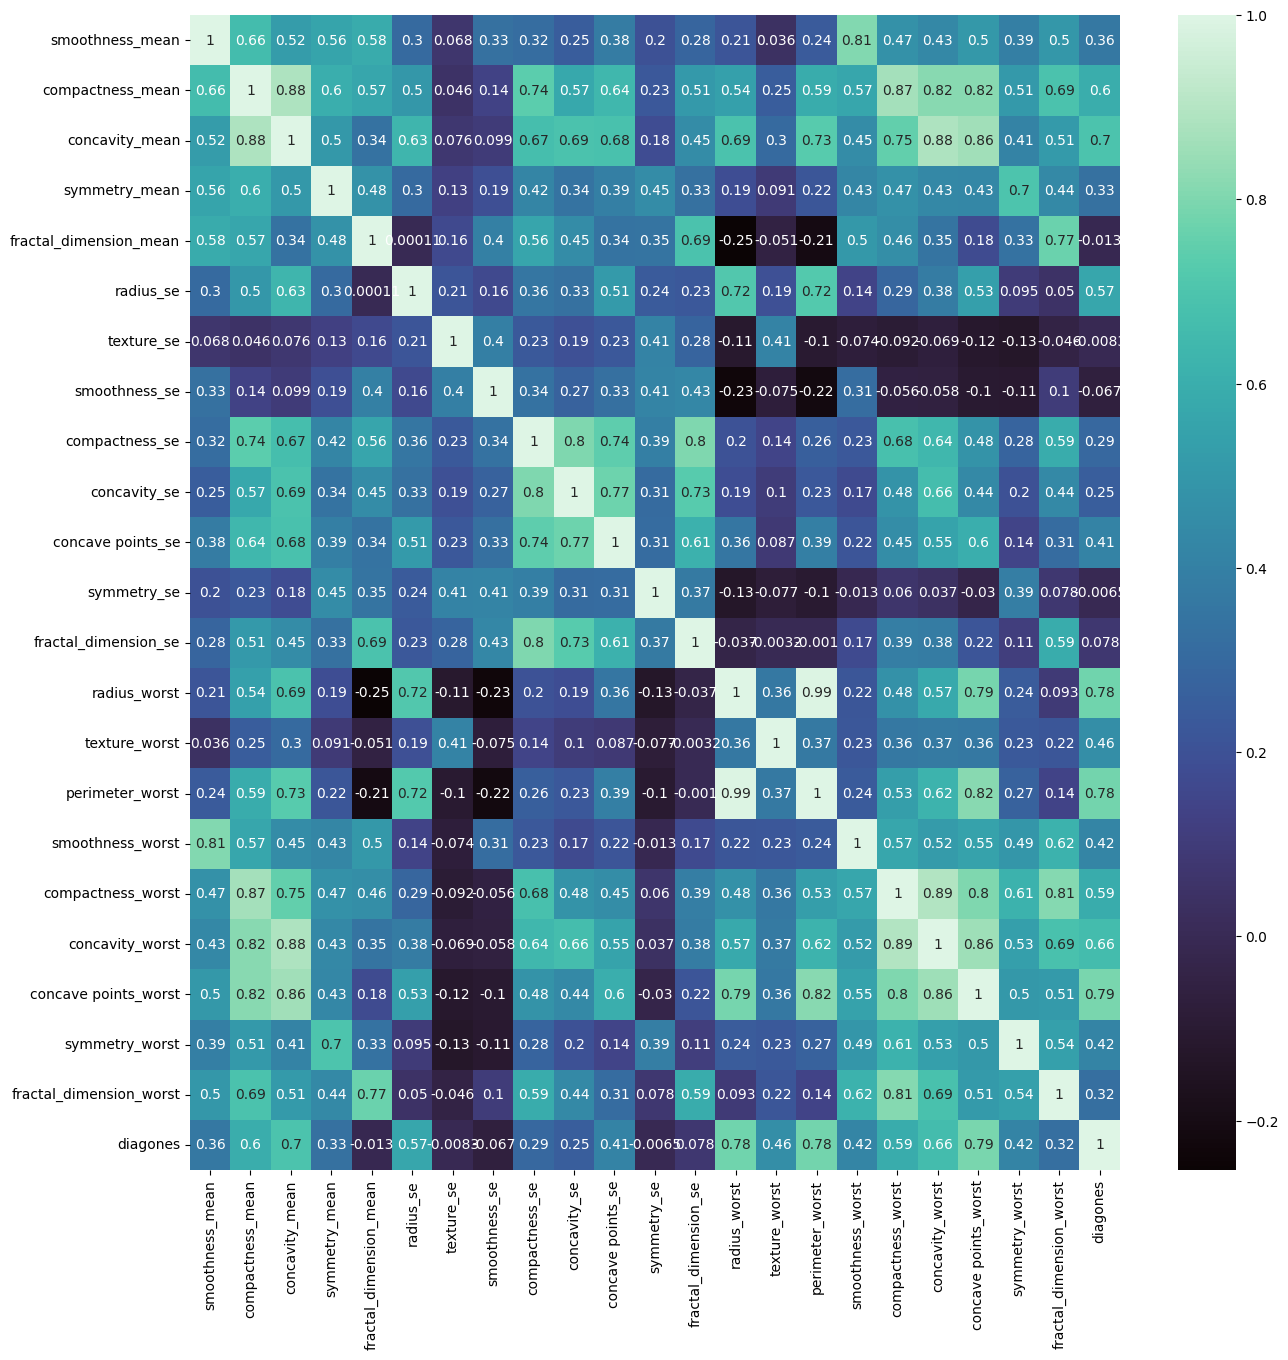

In [20]:
plt.figure(figsize=[15,15])
sns.heatmap(df.corr(),annot=True,cmap="mako");

In [21]:
X=df.drop(columns=['diagones'])
y=df['diagones']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.fit_transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred=lr.predict(X_test)

In [26]:
#from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[71,  0],
       [ 2, 41]])

In [27]:
print("test accuracy: ",round(accuracy_score(y_test,y_pred)*100))
print("train accuracy: ",round(accuracy_score(y_train,lr.predict(X_train))*100))



test accuracy:  98
train accuracy:  99


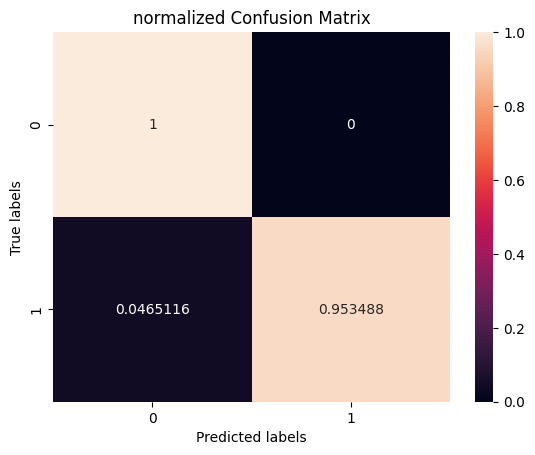

In [28]:
import pylab as pl
cm = confusion_matrix(y_test, y_pred,normalize='true')
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('normalized Confusion Matrix'); 


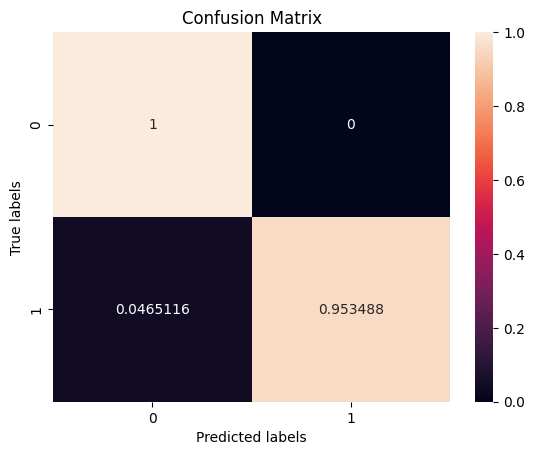

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)